# 📊 Customer Lifetime Value Prediction Project
### Internship - Data Analyst Role
**Dataset**: Online_Retail (Kaggle)  
**Author**: Tejasri  
**Started on**: 17 June 2025  


In [1]:
#  Step 1: Importing required libraries for analysis
import pandas as pd
import numpy as np

# Step 2: Setting  display options to show all columns
pd.set_option('display.max_columns', None)

#  Step 3: Loading the Excel dataset
file_path = '../data/Online_Retail.xlsx'
df = pd.read_excel(file_path)


# Displaying the first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning and Preprocessing

In [2]:
# Checking how many missing values are there
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
# Dropping rows where CustomerID or Description is missing
df = df.dropna(subset=['CustomerID', 'Description'])


In [4]:
# Shape after dropping nulls
df.shape


(406829, 8)

In [5]:
# Remove rows with Quantity or UnitPrice ≤ 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [6]:
# Remove cancelled invoices (those starting with "C")
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [7]:
# Resetting index
df.reset_index(drop=True, inplace=True)

# Previewing cleaned data
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Total rows BEFORE cleaning (reload original CSV)
original_df = pd.read_excel('../data/Online_Retail.xlsx')
print("Before cleaning:", original_df.shape)

# Total rows AFTER cleaning
print("After cleaning:", df.shape)


Before cleaning: (541909, 8)
After cleaning: (397884, 8)


In [9]:
import pandas as pd
import numpy as np

# Load cleaned CSV
df = pd.read_excel('../data/Online_Retail.xlsx')

# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


## Creating RFM features for each customer


In [10]:
import datetime
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Setting a reference date for Recency calculation
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [11]:
# groupby customerID and calculate rfm
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})


In [12]:
# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)


In [13]:
#Previewing the final rfm table
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [14]:
# Model Training 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [15]:
# Features: Recency and Frequency
X = rfm[['Recency', 'Frequency']]

# Target: Monetary value
y = rfm['Monetary']


In [16]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Creating the model
model = LinearRegression()

# Fitting it to the training data
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Predict LTV on test set
y_pred = model.predict(X_test)


In [19]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1802.9607460160294
RMSE: 7828.631297963202


In [20]:
# R^2 score: how well the model fits
model.score(X_test, y_test)


0.12862772370796072

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_excel('../data/Online_Retail.xlsx')

# Recreate TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set reference date
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Recalculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

# Prepare features and target
X = rfm[['Recency', 'Frequency']]
y = rfm['Monetary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [22]:
# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'CustomerID': X_test.index,
    'Recency': X_test['Recency'].values,
    'Frequency': X_test['Frequency'].values,
    'Actual_Monetary': y_test.values,
    'Predicted_Monetary': y_pred
})

# Save to excel
results.to_excel('../output/LTV_predictions.xlsx', index=False)


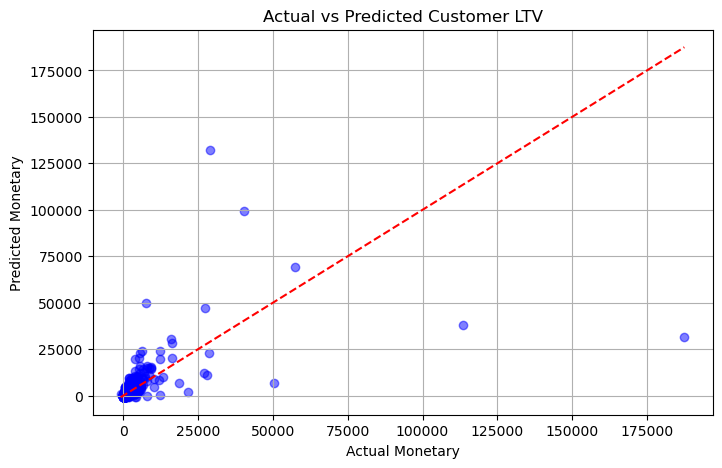

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Monetary")
plt.ylabel("Predicted Monetary")
plt.title("Actual vs Predicted Customer LTV")
plt.grid(True)

# ✅ Save BEFORE showing
plt.savefig('../output/actual_vs_predicted_scatter.png', dpi=300, bbox_inches='tight')

# ✅ Now show in notebook
plt.show()


In [24]:
# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'CustomerID': X_test.index,
    'Recency': X_test['Recency'].values,
    'Frequency': X_test['Frequency'].values,
    'Actual_Monetary': y_test.values,
    'Predicted_Monetary': y_pred
})

# Sort by highest predicted LTV
top_customers = results.sort_values(by='Predicted_Monetary', ascending=False).head(10)

# Show top 10
top_customers


,CustomerID,Recency,Frequency,Actual_Monetary,Predicted_Monetary
604,12748.0,1,224,29072.10,132319.994443
165,17841.0,2,169,40340.78,99488.237133
42,13089.0,3,118,57385.88,69044.484327
196,14527.0,3,86,7711.38,49940.448301
305,13408.0,2,81,27487.41,46952.138063
289,14156.0,10,66,113384.14,38023.558052
603,17450.0,8,55,187482.17,31449.936449
268,15189.0,1,53,15802.14,30232.801931
800,12921.0,4,50,16389.74,28451.712382
395,13078.0,1,43,12432.28,24262.790673


In [25]:
top_customers.to_excel('../output/top_10_predicted_customers.xlsx', index=False)


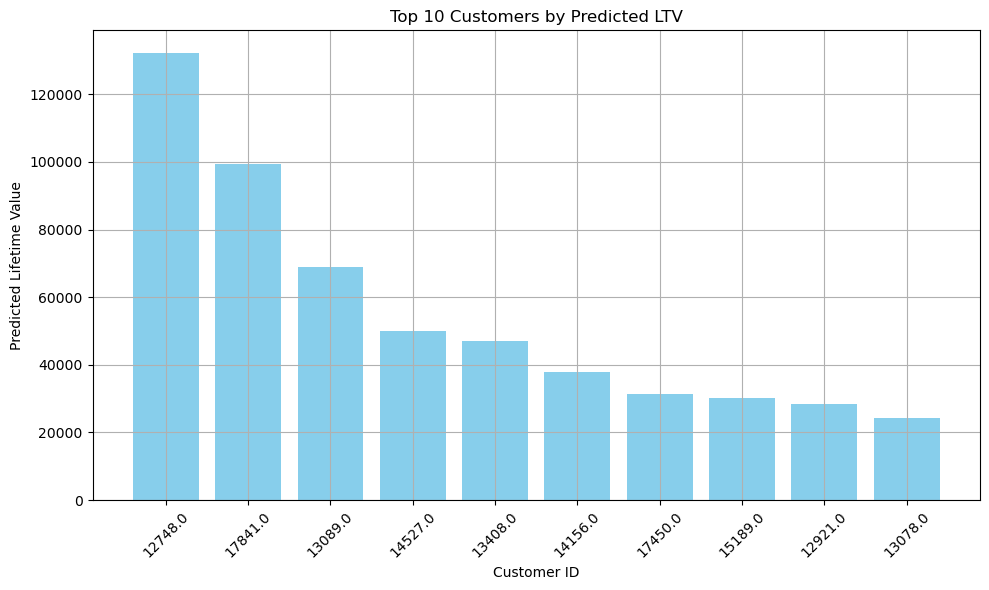

In [30]:
#bar chart for top_10_predicted_customers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Predicted_Monetary'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Predicted Lifetime Value')
plt.title('Top 10 Customers by Predicted LTV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# ✅ Save BEFORE showing
plt.savefig('../output/top_10_customers_bar_chart.png', dpi=300, bbox_inches='tight')

# ✅ Now show in notebook
plt.show()
